<a href="https://colab.research.google.com/github/sudarshanarote/DBMS/blob/master/BernoulliNB_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


When classifying a test document, the Bernoulli model uses binary occurrence information, ignoring the number of occurrences, whereas the multinomial model keeps track of multiple occurrences. As a result, the Bernoulli model typically makes many mistakes when classifying long documents. **BernoulliNB is designed for binary/boolean features**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv ('/content/drive/My Drive/ACTS Practical/iris.csv', header=None)
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# This function will find the mean of the given list
def find_mean(ls:list):
    # check if the list has some values
    if ls:
        # return the mean(sum_of_list_values/count_of_values_in_list)
        return(sum(ls)/len(ls))
    else:
        return 0
print("Mean for sepal_length: ",find_mean(list(df[0])))
print("Mean for sepal_width: ",find_mean(list(df[1])))
print("Mean for petal_length: ",find_mean(list(df[2])))
print("Mean for petal_width: ",find_mean(list(df[3])))

Mean for sepal_length:  5.843333333333335
Mean for sepal_width:  3.0540000000000007
Mean for petal_length:  3.7586666666666693
Mean for petal_width:  1.1986666666666672


In [ ]:
# This function will calculate variance of the given list of data-points.
# 1. calculate mean
# 2. find deviation from mean
# 3. square each deviation from mean
# 4. Find the sum of squares
# 5. Divide sum of squares by N-1(for sample data-points) or N(for population data-points)

def calculate_variance(ls:list):
    # check mean of the list of values
    mean = find_mean(ls)
    if mean!=0:
        return sum((i - mean) ** 2 for i in ls) / len(ls)
    else:
        return 0
    
print("Variance for sepal_length: ",calculate_variance(list(df[0])))
print("Variance for sepal_width: ",calculate_variance(list(df[1])))
print("Variance for petal_length: ",calculate_variance(list(df[2])))
print("Variance for petal_width: ",calculate_variance(list(df[3])))

Variance for sepal_length:  0.6811222222222222
Variance for sepal_width:  0.1867506666666667
Variance for petal_length:  3.0924248888888854
Variance for petal_width:  0.5785315555555559


In [ ]:
# This method will calculate the standard deviation
def calculate_standard_deviation(ls:list):
    return calculate_variance(ls)**(1/2)

print("Standard Devation for sepal_length: ",calculate_standard_deviation(list(df[0])))
print("Standard Devation for sepal_width: ",calculate_standard_deviation(list(df[1])))
print("Standard Devation for petal_length: ",calculate_standard_deviation(list(df[2])))
print("Standard Devation for petal_width: ",calculate_standard_deviation(list(df[3])))

Standard Devation for sepal_length:  0.8253012917851409
Standard Devation for sepal_width:  0.4321465800705435
Standard Devation for petal_length:  1.7585291834055201
Standard Devation for petal_width:  0.760612618588172


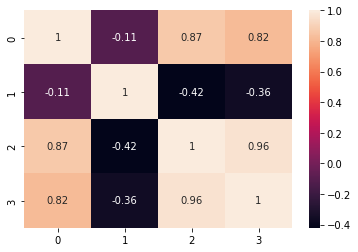

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot = True)

plt.show()

In [ ]:
from math import sqrt
import seaborn as sns

# Statistics
from statistics import median,mean, stdev
from scipy import signal

import scipy.stats as stats
from scipy.stats import binom, poisson, bernoulli, norm

**Normal Distribution**

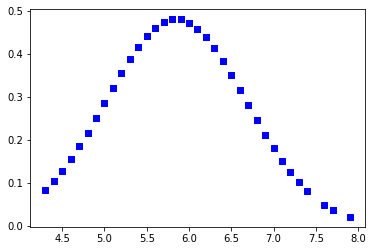

In [ ]:
mean_sepal_length = mean(df[0])
sd_sepal_length = stdev(df[0])
normal_df = norm.pdf(df[0],  loc = mean_sepal_length, scale = sd_sepal_length)
plt.plot(df[0], normal_df, 'bs')
plt.show()

In [ ]:
normal_df

array([0.32200588, 0.25178867, 0.18572654, 0.15606028, 0.28682488,
       0.41744843, 0.15606028, 0.28682488, 0.10546982, 0.25178867,
       0.41744843, 0.21783211, 0.21783211, 0.08482926, 0.48111665,
       0.47461229, 0.41744843, 0.32200588, 0.47461229, 0.32200588,
       0.41744843, 0.32200588, 0.15606028, 0.32200588, 0.21783211,
       0.28682488, 0.28682488, 0.35626826, 0.35626826, 0.18572654,
       0.21783211, 0.41744843, 0.35626826, 0.44209459, 0.25178867,
       0.28682488, 0.44209459, 0.25178867, 0.10546982, 0.32200588,
       0.28682488, 0.1292341 , 0.10546982, 0.28682488, 0.32200588,
       0.21783211, 0.32200588, 0.15606028, 0.38846939, 0.28682488,
       0.18161945, 0.38433694, 0.21342967, 0.44209459, 0.35179363,
       0.47461229, 0.41381158, 0.25178867, 0.3173439 , 0.35626826,
       0.28682488, 0.48064911, 0.47322998, 0.45917972, 0.46141734,
       0.28212312, 0.46141734, 0.48111665, 0.43909601, 0.46141734,
       0.48064911, 0.45917972, 0.41381158, 0.45917972, 0.38433

In [ ]:
norm.pdf??


Text(0.5, 1.0, 'Distribution')

<Figure size 1296x360 with 0 Axes>

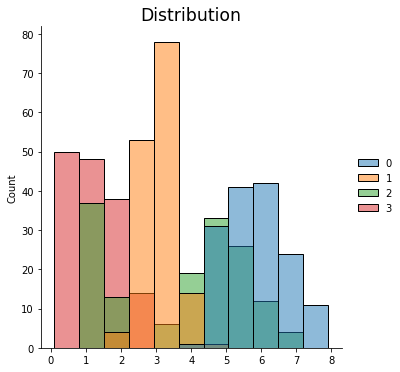

In [ ]:
# Normal Distribution as a Bell Curve
plt.figure(figsize=(18,5))
sns.displot(df)
plt.title('Distribution', fontsize='xx-large')

In [ ]:
sns.displot??

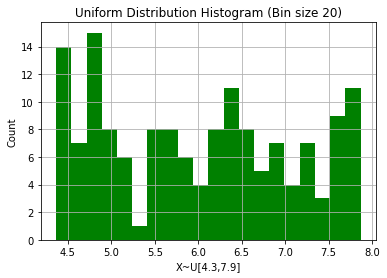

In [ ]:
min_sepal_length = df[0].min()
max_sepal_length = df[0].max()
count_sepal_length = df[0].count()

data = np.random.uniform(min_sepal_length, max_sepal_length, count_sepal_length)
count, bins, ignored = plt.hist(data, 20, facecolor='green') 

plt.xlabel('X~U['+str(min_sepal_length)+','+str(max_sepal_length)+']')
plt.ylabel('Count')
plt.title("Uniform Distribution Histogram (Bin size 20)")
plt.grid(True)

plt.show(block = False)

In [ ]:
np.random.uniform??

**Poisson Distribution**

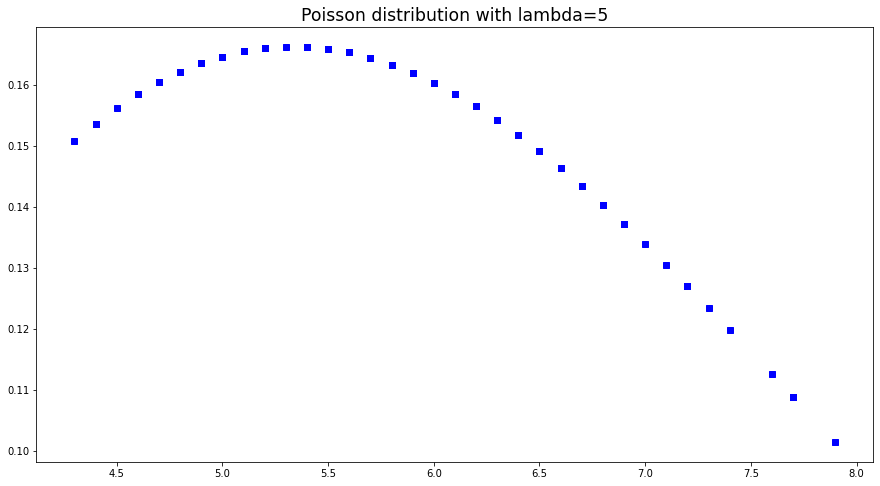

In [ ]:
from scipy.special import factorial
#x = np.arange(0, 20, 0.1)

x=pd.Series(df[0]).to_numpy()


y = np.exp(-mean_sepal_length)*np.power(mean_sepal_length, x)/factorial(x)

plt.figure(figsize=(15,8))
plt.title('Poisson distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()


**ON SOCIAL NETWORK ADS DATASET**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
data = pd.read_csv ('/content/drive/My Drive/ACTS Practical/Social_Network_Ads.csv')
data.head()
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1]


In [ ]:
# Predicting probabalities 
y_pred_proba = classifier.predict_proba(X_test)
print(y_pred_proba)

[[0.89400067 0.10599933]
 [0.84165896 0.15834104]
 [0.85348304 0.14651696]
 [0.92105103 0.07894897]
 [0.89959751 0.10040249]
 [0.95576942 0.04423058]
 [0.90620397 0.09379603]
 [0.03594311 0.96405689]
 [0.98971238 0.01028762]
 [0.49678961 0.50321039]
 [0.95367413 0.04632587]
 [0.96478665 0.03521335]
 [0.860266   0.139734  ]
 [0.73041847 0.26958153]
 [0.97546232 0.02453768]
 [0.48531106 0.51468894]
 [0.79428605 0.20571395]
 [0.979477   0.020523  ]
 [0.00400315 0.99599685]
 [0.86182158 0.13817842]
 [0.89994625 0.10005375]
 [0.00488885 0.99511115]
 [0.75520429 0.24479571]
 [0.13099759 0.86900241]
 [0.97992931 0.02007069]
 [0.00455902 0.99544098]
 [0.92054458 0.07945542]
 [0.92955737 0.07044263]
 [0.84925986 0.15074014]
 [0.864263   0.135737  ]
 [0.96926322 0.03073678]
 [0.78265882 0.21734118]
 [0.10438626 0.89561374]
 [0.86207101 0.13792899]
 [0.97996064 0.02003936]
 [0.99180918 0.00819082]
 [0.97349249 0.02650751]
 [0.91339539 0.08660461]
 [0.94062349 0.05937651]
 [0.38449172 0.61550828]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)
print(ac)

[[55  3]
 [ 4 18]]
0.9125
